# Deducción de la parametrización de la rampa

Suponga un cono con base elipsoidal cuyos semiejes son $a$ (en el eje X) y $b$ (en el eje Y), ubicada a una altura $z_c$. El cono se extiende en dirección -Z, teniendo una altura h, de modo que su vértice se ubica en las coordenadas (0,0, z_c - h).

Podemos parametrizar la superficie del manto del cono de la siguiente forma

$$\tag{1}
C = \left\{ (x,y,z) \in \mathbb{R}^n: \, x(\theta, \zeta) = R_a(\zeta)\cos(\theta),\, y(\theta, \zeta) = R_b(\zeta)\sin(\theta),\, z(\zeta) = \zeta, \quad \theta \in \frac{\mathbb{R}}{2\pi\mathbb{Z}}, \, \zeta \in [z_c - h, z_c]  \right\}
$$

donde $R_a(\zeta) = \frac{a}{h}(h-z_c+\zeta), \, R_b(\zeta) = \frac{b}{h}(h-z_c+\zeta)$. Además, denotaremos $\displaystyle \varphi: \frac{\mathbb{R}}{2\pi\mathbb{Z}} \times [z_c - h, z_c] \rightarrow C $ a la carta que representa la parametrización del cono.

Resolveremos una EDO en el espacio $\frac{\mathbb{R}}{2\pi\mathbb{Z}} \times [z_c - h, z_c]$ de modo que, a través de la carta, obtendremos una curva integral la cual será la rampa deseada. 

Suponga que
$$\tag{2}
\left\{\begin{array}{ccc}
    \theta'(t) &=& 1, \\
    \zeta'(t) &=& m(t)
\end{array}\right. \quad t\in [0, t_f]
$$
con condiciones iniciales $\theta(0) = \theta_0, \, \zeta(0) = z_c$ y con $t_f>0$ algún tiempo final. Claramente, $\theta(t) = \theta_0 + t$. Para deducir quién es $m$, queremos que $\zeta$ descienda con pendiente constante de ángulo $\alpha \in [0, \pi/2)$. Esto es,

$$\tag{3}
\frac{d\zeta}{d\ell} = -p = -\tan(\alpha)
$$

donde $\ell(t) = \int_0^t |\gamma'(t)| \,dt$, y $\gamma$ es la curva integral dada por

$$\tag{4}
\gamma(t) = \varphi(\theta(t), \zeta(t))
$$

Por lo tanto,

$$\tag{5}
|\gamma'(t)| = \sqrt{ \Big( R_a'(t)\cos(\theta(t)) - R_a(t)\sin(\theta(t))\theta'(t) \Big)^2 + \Big( R_b'(t)\sin(\theta(t)) + R_b(t)\cos(\theta(t))\theta'(t) \Big)^2 + (\zeta'(t))^2}
$$

Usando que $R_a'(t) = \frac{a}{h}\zeta'(t), \, R_b'(t) = \frac{b}{h}\zeta'(t)$ y bajo el supuesto que $\theta'=1$, la expresión anterior es equivalente a

$$\tag{6}
|\gamma'(t)| = \sqrt{ \Big( \frac{a}{h}m\cos(\theta(t)) - R_a(t)\sin(\theta(t)) \Big)^2 + \Big( \frac{b}{h}m\sin(\theta(t)) + R_b(t)\cos(\theta(t)) \Big)^2 + m^2 } \\
= \sqrt{ \left( 1 + \frac{a^2}{h^2}\cos^2(\theta) + \frac{b^2}{h^2}\sin^2(\theta) \right)m^2 + \left( -2 \frac{a}{h}R_a \sin(\theta)\cos(\theta) + 2\frac{b}{h}R_b\sin(\theta)\cos(\theta) \right)m + R_a^2\sin^2(\theta) + R_b^2\cos^2(\theta) }
$$


Por lo tanto, $(3)$ es equivalente a
$$\tag{7}
\frac{\zeta'(t)}{\ell'(t)} = -p
$$

Utilizando todo lo anterior, llegamos a la siguiente expresión cuadrática
$$\tag{8}
0 = \left(p^2\left( 1 + \frac{a^2}{h^2}\cos^2(\theta) + \frac{b^2}{h^2}\sin^2(\theta) \right)-1\right)m^2 + p^2\left( -2 \frac{a}{h}R_a \sin(\theta)\cos(\theta) + 2\frac{b}{h}R_b\sin(\theta)\cos(\theta) \right)m + p^2(R_a^2\sin^2(\theta) + R_b^2\cos^2(\theta))
$$

de donde deducimos que
$$\tag{9}
\zeta'(t) = \frac{-B + \sqrt{B^2 - 4AC}}{2A}
$$

donde 
$$
\begin{array}{c}
    A = p^2\left( 1 + \frac{a^2}{h^2}\cos^2(\theta) + \frac{b^2}{h^2}\sin^2(\theta) \right)-1 \\
    B = p^2\left( -2 \frac{a}{h}R_a \sin(\theta)\cos(\theta) + 2\frac{b}{h}R_b\sin(\theta)\cos(\theta) \right) \\
    C = p^2(R_a^2\sin^2(\theta) + R_b^2\cos^2(\theta))
\end{array}
$$

In [1]:
import numpy as np
import numpy.matlib as matlib
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors 
from matplotlib import cm
import time

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

import Tabesh2013functions as tb


# Parametrización de curva en cono truncado

In [36]:
# Geometría del cono
# Para que el origen sea 0, a_1/z_1 = a_2/z_2, b_1/z_1 = b_2/z_2

n = 100

Altura_Cono = 8
Semieje_X = 10
Semieje_Y = 8

Theta = np.linspace(0, 2*np.pi, n)
Z = np.linspace(0, Altura_Cono, n)

Theta, Z = np.meshgrid(Theta, Z)

X = (Semieje_X/Altura_Cono)*Z*np.cos(Theta)
Y = (Semieje_Y/Altura_Cono)*Z*np.sin(Theta)


Angulo_Descenso = 30
Diametro_Rampa = 2
theta_0 = 45

Angulo_Descenso = Angulo_Descenso*np.pi/180
theta_0 = theta_0*np.pi/180
Altura_Critica = Altura_Cono*Diametro_Rampa/(2*np.min([Semieje_X,Semieje_Y]))

t_final = (Altura_Cono - Altura_Critica)/np.tan(Angulo_Descenso)
T = np.linspace(0, t_final, n)


X_curve = (Semieje_X/Altura_Cono)*(Altura_Cono - np.tan(Angulo_Descenso)*T)*np.cos(theta_0+T)
Y_curve = (Semieje_Y/Altura_Cono)*(Altura_Cono - np.tan(Angulo_Descenso)*T)*np.sin(theta_0+T)
Z_curve = Altura_Cono - np.tan(Angulo_Descenso)*T

Semieje_X_down = Semieje_X*Altura_Critica/Altura_Cono
Semieje_Y_down = Semieje_Y*Altura_Critica/Altura_Cono

X_inf = Semieje_X_down*np.cos(T)
Y_inf = Semieje_Y_down*np.sin(T)
Z_inf = np.array(np.ones(n)*Altura_Critica)



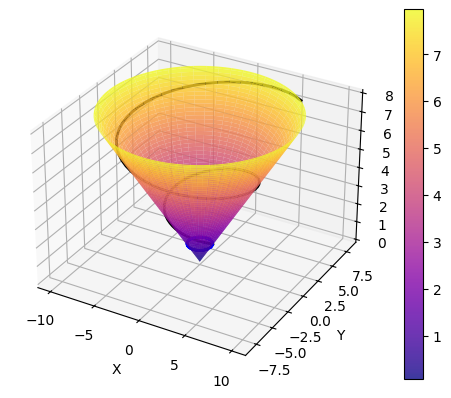

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)

ax.plot3D(X_curve, Y_curve, Z_curve, color='black', linewidth=2)
ax.plot3D(X_inf, Y_inf, Z_inf, color='blue', linewidth=2)
fig.colorbar(surf)



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_title('Superficie con curva')
# ax.legend()

plt.show()

In [38]:
# Crear figura interactiva
fig = go.Figure()

# Superficie
fig.add_trace(go.Surface(
    x=X, y=Y, z=Z,
    colorscale='Viridis',
    opacity=0.8,
    showscale=False
))

# Curva
fig.add_trace(go.Scatter3d(
    x=X_curve,
    y=Y_curve,
    z=Z_curve,
    mode='lines',
    line=dict(color='black', width=5),
    name='Curva'
))

fig.add_trace(go.Scatter3d(
    x=X_inf,
    y=Y_inf,
    z=Z_inf,
    mode='lines',
    line=dict(color='red', width=5),
    name='Curva'
))

# Layout
fig.update_layout(
    title='Superficie con curva (interactiva)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=650,
    height=600
)

# Prueba con CP fases

In [5]:
mina_cp = pd.read_csv('mina_clusterizada.csv')
# mina_cp.rename(columns={'0': 'id'}, inplace=True)

fase = mina_cp[mina_cp['fase']==4]

In [6]:
fase

x          y       z        au       cpy      cueq       cus  \
0      491425.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
1      491435.0  7456195.0  1968.0  0.266522  1.057851  0.640223  0.021141   
2      491445.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
3      491455.0  7456195.0  1968.0  0.243283  2.427782  0.531022  0.019991   
4      491435.0  7456205.0  1968.0  0.288929  1.124707  0.712658  0.022003   
...         ...        ...     ...       ...       ...       ...       ...   
28773  491735.0  7456885.0  2304.0  0.010000  0.043324  0.015000  0.001000   
28774  491695.0  7456905.0  2304.0  0.007715  0.072553  0.025120  0.007060   
28775  491705.0  7456905.0  2304.0  0.010000  0.043324  0.015000  0.001000   
28776  491715.0  7456905.0  2304.0  0.010000  0.043324  0.015000  0.001000   
28777  491705.0  7456915.0  2304.0  0.010000  0.043324  0.015000  0.001000   

            cut   density  material        py    recg_au    recg_cu     tasox  \
0      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
1      0.491924  2.626056         8  0.197908  68.839492  87.471598  0.042976   
2      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
3      0.396348  2.637350         6  0.399009  68.633711  87.659524  0.050438   
4      0.550661  2.615598         8  0.401511  69.001505  87.011938  0.039957   
...         ...       ...       ...       ...        ...        ...       ...   
28773  0.015000  2.417566         0  0.000000   0.000000   0.000000  0.066667   
28774  0.025120  2.336183         0  0.000000   0.000000   0.000000  0.281071   
28775  0.015000  2.344145         0  0.000000   0.000000   0.000000  0.066667   
28776  0.015000  2.344145         0  0.000000   0.000000   0.000000  0.066667   
28777  0.015000  2.344145         0  0.000000   0.000000   0.000000  0.066667   

       tipomineral  fase     id  destino  cluster  
0                2     4      1        1        1  
1                2     4      2        1        1  
2                2     4      3        1        1  
3                2     4      4        1        1  
4                2     4      5        1        1  
...            ...   ...    ...      ...      ...  
28773            0     4  90628        0       18  
28774            0     4  90792        0       18  
28775            0     4  90793        0       18  
28776            0     4  90794        0       18  
28777            0     4  90795        0       18  

[28778 rows x 19 columns]

In [7]:
# def plot_fase(fase, width=900, height=800, column_hue='cluster'):
#     fig = go.Figure()

#     fig.add_trace(go.Scatter3d(
#         x=fase['x'],
#         y=fase['y'],
#         z=fase['z'],
#         mode='markers',
#         marker=dict(
#             size=5,  # tamaño del punto
#             color=fase[column_hue],  # color según columna 'cut'
#             colorscale='rainbow',
#             colorbar=dict(title=column_hue),
#             opacity=0.8
#         ),
#         hovertemplate=(
#             "ID: %{customdata[0]}<br>" +
#             f"{column_hue}:"+"%{marker.color:.3f}<br>"
#         ),
#         customdata=fase[['id', column_hue]],
#         name='Bloques'
#     ))

#     fig.update_layout(
#         scene=dict(
#             xaxis_title='X',
#             yaxis_title='Y',
#             zaxis_title='Z',
#             aspectmode='data'
#         ),
#         title=f'Puntos 3D con Color según {column_hue}',
#         width=900,
#         height=800
#     )

#     fig.show()

tb.plot_fase_3D(fase)

In [8]:
df_lower = fase[fase['z'] == 1952]
df_upper = fase[fase['z'] == 1968]


BlockWidth = 10
BlockHeight = 10
x_min_lower = df_lower['x'].min()-BlockWidth
x_max_lower = df_lower['x'].max()+BlockWidth
y_min_lower = df_lower['y'].min()-BlockHeight
y_max_lower = df_lower['y'].max()+BlockHeight

x_min_upper = df_upper['x'].min()-BlockWidth
x_max_upper = df_upper['x'].max()+BlockWidth
y_min_upper = df_upper['y'].min()-BlockHeight
y_max_upper = df_upper['y'].max()+BlockHeight

P1_lower = (x_min_lower, y_min_lower)
P2_lower = (x_max_lower, y_max_lower)
P1_upper = (x_min_upper, y_min_upper)
P2_upper = (x_max_upper, y_max_upper)


Precedencias_lower, df_lower, Centers_lower, t_lower = tb.Precedencias_Clusters_Angle(df_lower, P1_lower, P2_lower,BlockWidth, BlockHeight, Angle=30)

Precedencias_upper, df_upper, Centers_upper, t_upper = tb.Precedencias_Clusters_Angle(df_upper, P1_upper, P2_upper,BlockWidth, BlockHeight, Angle=30)

# Crear figura
fig = go.Figure()

hue = 'cluster'

# Capa inferior: 'viridis'
fig.add_trace(go.Scatter3d(
    x=df_lower['x'],
    y=df_lower['y'],
    z=df_lower['z'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_lower[hue],
        colorscale='rainbow',
        cmin=fase[hue].min(),
        cmax=fase[hue].max(),
        colorbar=dict(title=f'{hue} (Capa Inferior)', x=1.25, y=0.5),
        opacity=1
    ),
    name='Capa Inferior',
    hovertemplate="Z: %{z}"+f"<br>{hue}:"+"%{marker.color:.3f}<extra></extra>"
))

# Capa superior: 'plasma'
fig.add_trace(go.Scatter3d(
    x=df_upper['x'],
    y=df_upper['y'],
    z=df_upper['z'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_upper[hue],
        colorscale='icefire',
        cmin=fase[hue].min(),
        cmax=fase[hue].max(),
        colorbar=dict(title=f'{hue} (Capa Superior)', x=1.35, y=0.4),  # ubicar al lado derecho
        opacity=0.8
    ),
    name='Capa Superior',
    hovertemplate="Z: %{z}"+f"<br>{hue}:"+"%{marker.color:.3f}<extra></extra>"
))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'
    ),
    title='Dos capas 3D con colores diferenciados',
    width=1000,
    height=600,
    showlegend=True
)

fig.show()

# Prueba de gráfico con Precedencias Verticales

In [9]:
P = 4
R = 0.85 
C_r = 0.25 
C_m = 2 
C_p = 10 
FTL = 2204.62 # Factor tonelada-libra
vol = 1600  # volumen por bloque, puedes ajustar este valor
capacidad_maxima_planta = 5500000
capacidad_maxima_mina = 16000000
# Calcula masa y ley ponderada para cada bloque
mina_cp = pd.read_csv("mina_clusterizada.csv")
fase = 4

mina_df = mina_cp[mina_cp['fase']==fase].copy()


z_sorted = np.sort(mina_df['z'].unique())[::-1]
bancos = np.array(range(1,len(z_sorted)+1))
z_to_banco = dict(zip(z_sorted, bancos))
mina_df["banco"] = mina_df["z"].map(z_to_banco)

mina_df['masa'] = mina_df['density'] * vol
mina_df['fino_total'] = mina_df['masa'] * mina_df['cut']
mina_df['tripleta_fbc'] = list(zip(mina_df['fase'], mina_df['banco'], mina_df['cluster']))
cluster_df = mina_df.groupby('tripleta_fbc').agg({
    'z': 'first',
    'masa': 'sum',
    'fino_total': 'sum'
}).reset_index()

params = {
    row['tripleta_fbc']: {col: row[col] for col in cluster_df.columns if col != 'tripleta_fbc'}
    for _, row in cluster_df.iterrows()
}

banco_lower = 4
banco_upper = banco_lower-1

fase_banco_lower = mina_df[mina_df['banco']==banco_lower].copy()
fase_banco_upper = mina_df[mina_df['banco']==banco_upper].copy()

In [10]:
from collections import defaultdict
import aux_tools as aux

arcs = aux.Global_Vertical_Arc_Calculation(mina_df)
# arcs es un diccionario con llave (f,b,c) y guarda una lista de (f_,b_,c_) indicando los cluster superiores
# Convierte arcs a un defaultdict con ints normales
arcs_clean = defaultdict(list)
for key, values in arcs.items():
    # key limpio
    key_clean = tuple(int(k) for k in key)
    # lista de valores limpios
    values_clean = [tuple(int(v) for v in value) for value in values]
    arcs_clean[key_clean] = values_clean


In [11]:
tb.plot_fase_3D(mina_df)

In [12]:
tb.plot_2_fase_banco_3D([fase_banco_lower, fase_banco_upper], arcs=arcs_clean, z_ratio=10)

# Fitting mejor cono elipsoidal

### Idea: 2D

$$
\min_{(z,\alpha)} \frac{1}{2} \|z - z_b\|^2 + \frac{1}{2}\|\alpha - \alpha_b\|^2
$$

con $z_b$ la altura de la fase banco más baja y $\alpha_b$ el ángulo máximo del pit. Como restricciones, queremos que

$$
z_b \geq z_b - \varepsilon, \quad 0\leq \alpha \leq \alpha_b
$$

con $\varepsilon>0$ una tolerancia dada, y de modo que $z(x)=\tan(\alpha)|x|$ no "choque" con ningún bloque de la fase. Esto es, si $(x_i, z_i)$ es la coordenada de los bloques de la fase, entonces $z(x_i) \leq z_i, \; \forall i$.

### Ejemplo Cono circular y elipsoidal

$$
\min_{(z,\alpha)} \frac{1}{2} \|z - z_b\|^2 + \frac{1}{2}\|\alpha - \alpha_b\|^2
$$

con $z_b$ la altura de la fase banco más baja y $\alpha_b$ el ángulo máximo del pit. Como restricciones, queremos que

$$
z_b \geq z_b - \varepsilon, \quad 0\leq \alpha \leq \alpha_b
$$

$\varepsilon>0$ tolerancia dada. Si $(x_i, y_i, z_i)$ es coordenada de los bloques de la fase, entonces $z(x_i, y_i) \leq z_i$, donde

$$
z(x,y) = \tan(\alpha)\|(x,y)\|
$$

En el caso de un cono elipsoidal, verifiquemos, en primera instancia, esta restricción como 

In [1]:
import numpy as np
import numpy.matlib as matlib
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors 
from matplotlib import cm
import time

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

import Tabesh2013functions as tb


In [2]:
mina_cp = pd.read_csv('mina_clusterizada.csv')
z_sorted = np.sort(mina_cp['z'].unique())[::-1]
bancos = np.array(range(1,len(z_sorted)+1))
z_to_banco = dict(zip(z_sorted, bancos))
mina_cp["banco"] = mina_cp["z"].map(z_to_banco)

fases = mina_cp['fase'].unique()

fases_new = []
for f in fases:
    fase = mina_cp[mina_cp['fase']==f].copy()
    z_sorted = np.sort(fase['z'].unique())[::-1]
    bancos = np.array(range(1,len(z_sorted)+1))
    z_to_banco = dict(zip(z_sorted, bancos))
    fase['banco'] = fase['z'].map(z_to_banco)
    fases_new.append(fase)

mina_df = pd.concat(fases_new)


fase = mina_df[mina_df['fase']==4]

x_barra = fase['x'].mean()
y_barra = fase['y'].mean()


In [33]:
fase['banco'].unique()

array([22, 23, 19, 20, 21, 16, 18, 17, 14, 15, 13, 10, 12, 11,  7,  8,  9,
        4,  5,  6,  3,  2,  1])

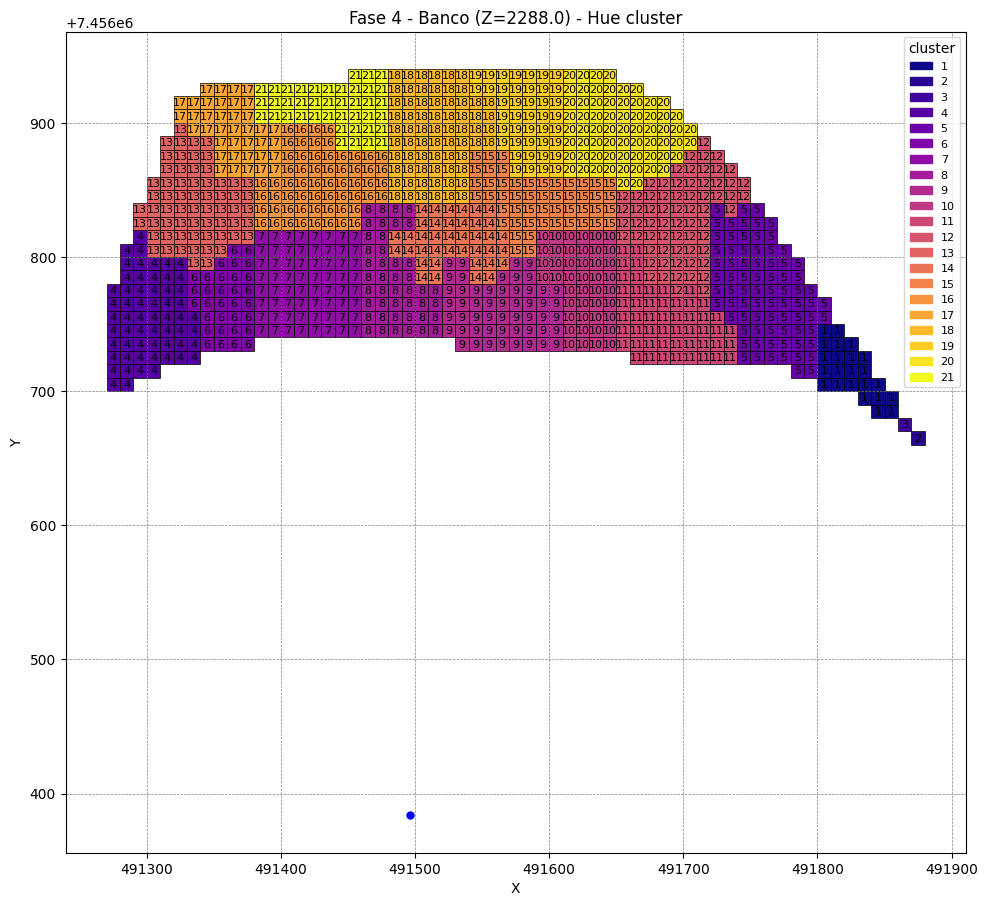

In [6]:
fase_banco = fase[fase['banco']==2]
tb.plot_fase_banco(fase_banco, points=[(x_barra, y_barra)], column_hue='cluster')

In [ ]:
x_barra = mina_df['x'].mean()
y_barra = mina_df['y'].mean()

fase_banco = fase[fase['banco']==2]
points = fase_banco[['x', 'y']].to_numpy() - (x_barra, y_barra)

def objective(params):
    a, b = params
    if a < 0 or b < 0:
        return np.inf
    return np.pi*a*b

def constrainst_gen(point):
    def constraint(params):
        a, b = params
        A = np.array([[1/a**2, 0],
                      [0, 1/b**2]])
        return 1 - point @ A @ point
    return constraint

constraints = [{'type': 'ineq', 'fun': constrainst_gen(p)} for p in points]
elipse_0 = [100,100]

result = sp.optimize.minimize(objective, elipse_0, constraints=constraints, method='SLSQP')

a_optimo, b_optimo = result.x

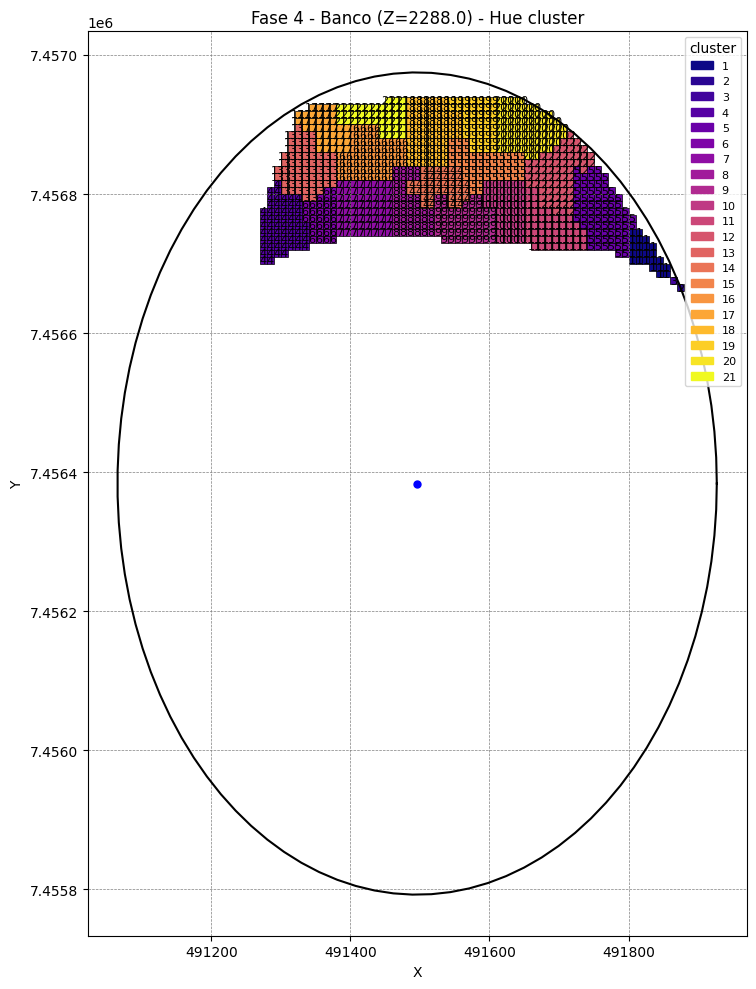

In [38]:
tb.plot_fase_banco(fase_banco, elipse=[(a_optimo, b_optimo, x_barra, y_barra)], points=[(x_barra, y_barra)], column_hue='cluster')


In [39]:
def objective(params):
    a, b = params
    if a < 0 or b < 0:
        return np.inf
    return np.pi*a*b

def constrainst_gen(point):
    def constraint(params):
        a, b = params
        A = np.array([[1/a**2, 0],
                      [0, 1/b**2]])
        return 1 - point @ A @ point
    return constraint

x_barra = fase['x'].mean()
y_barra = fase['y'].mean()

alturas = fase['z'].unique()
elipses = []

for h in alturas:
    fase_banco = fase[fase['z']==h]
    points = fase_banco[['x', 'y']].to_numpy() - (x_barra, y_barra)
    constraints = [{'type': 'ineq', 'fun': constrainst_gen(p)} for p in points]
    elipse_0 = [1,1]

    result = sp.optimize.minimize(objective, elipse_0, constraints=constraints, method='SLSQP')
    a_opt, b_opt = result.x

    elipses.append((a_opt, b_opt, x_barra, y_barra, h))

    

In [55]:
tb.plot_fase_3D(fase, elipses=elipses, opacity_blocks=0.5, z_ratio=1)

In [ ]:
def objective(params):
    a, b, h = params
    varepsilon = 1e-6
    if (a <= varepsilon) or (b <= varepsilon) or (h <= varepsilon):
        return np.inf
    return (1/3)*np.pi*a*b*h

# point = (x,y,z, z_c)
def constrainst_gen(point):
    def constraint(params):
        a, b, h = params
        A = (a/h)*(h-point[3]+point[2])
        B = (b/h)*(h-point[3]+point[2])
        if A < 0:
            A = 1e-12
        if B < 0:
            B = 1e-12
        M = np.array([[1/A**2, 0],
                      [0, 1/B**2]])
        return 1 - (point[0:2]) @ M @ point[0:2]
    return constraint

x_c = mina_df['x'].mean()
y_c = mina_df['y'].mean()
z_c = mina_df['z'].max()

fase_copy = fase.copy()
fase_copy['z_c'] = np.ones(len(fase))*z_c
points = np.array(fase_copy[['x', 'y', 'z', 'z_c']]) - (x_c, y_c, 0, 0)

a_guess = fase['x'].max() - fase['x'].min()
b_guess = fase['y'].max() - fase['y'].min()
h_guess = fase['z'].max()

constraints = [{'type': 'ineq', 'fun': constrainst_gen(p)} for p in points]


initial_guess = (a_guess, b_guess, h_guess)

result = sp.optimize.minimize(objective, initial_guess, constraints=constraints, method='SLSQP')


In [26]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 248880853.2624079
       x: [ 6.450e+02  6.979e+02  5.280e+02]
     nit: 24
     jac: [ 3.859e+05  3.566e+05  4.714e+05]
    nfev: 106
    njev: 20

In [27]:
a_opt, b_opt, h_opt = result.x

tb.plot_fase_3D(fase, cone=(a_opt, b_opt, h_opt, x_c, y_c, z_c))

In [30]:
points[0][0:2]

array([ -70.97335729, -178.68517342])

In [41]:
x_c = mina_df['x'].mean()
y_c = mina_df['y'].mean()
z_c = mina_df['z'].max()

# fase_copy = fase.copy()
# fase_copy['z_c'] = np.ones(len(fase))*z_c
# points = np.array(fase_copy[['x', 'y', 'z', 'z_c']])

# a_guess = fase['x'].max() - fase['x'].min()
# b_guess = fase['y'].max() - fase['y'].min()
# h_guess = fase['z'].max()

mina_df_copy = mina_df.copy()
mina_df_copy['z_c'] = np.ones(len(mina_df_copy))*z_c
points = np.array(mina_df_copy[['x', 'y', 'z', 'z_c']])

a_guess = mina_df_copy['x'].max() - mina_df_copy['x'].min()
b_guess = mina_df_copy['y'].max() - mina_df_copy['y'].min()
h_guess = mina_df_copy['z'].max()


def objective(params):
    a, b, h, x_cone, y_cone = params
    varepsilon = 1e-2
    if (a <= 0) or (b <= 0) or (h <= 0):
        return np.inf
    return (1/3)*np.pi*a*b*h + varepsilon*abs(x_cone-x_c)**2 + varepsilon*abs(y_cone-y_c)**2

def constrainst_gen(point):
    def constraint(params):
        a, b, h, x_cone, y_cone = params
        A = (a/h)*(h-point[3]+point[2])
        B = (b/h)*(h-point[3]+point[2])
        if A < 0:
            A = 1e-12
        if B < 0:
            B = 1e-12
        M = np.array([[1/A**2, 0],
                      [0, 1/B**2]])
        return 1 - (point[0:2]-np.array((x_cone, y_cone))) @ M @ (point[0:2]-np.array((x_cone, y_cone)))
    return constraint

constraints = [{'type': 'ineq', 'fun': constrainst_gen(p)} for p in points]

initial_guess = (a_guess, b_guess, h_guess, x_c, y_c)
result = sp.optimize.minimize(objective, initial_guess, constraints=constraints, method='SLSQP')


# Prueba final

In [1]:
import numpy as np
import numpy.matlib as matlib
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors 
from matplotlib import cm
import time

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

import Tabesh2013functions as tb

In [2]:
mina_cp = pd.read_csv('mina_clusterizada.csv')
z_sorted = np.sort(mina_cp['z'].unique())[::-1]
bancos = np.array(range(1,len(z_sorted)+1))
z_to_banco = dict(zip(z_sorted, bancos))
mina_cp["banco"] = mina_cp["z"].map(z_to_banco)

fases = mina_cp['fase'].unique()

fases_new = []
for f in fases:
    fase = mina_cp[mina_cp['fase']==f].copy()
    z_sorted = np.sort(fase['z'].unique())[::-1]
    bancos = np.array(range(1,len(z_sorted)+1))
    z_to_banco = dict(zip(z_sorted, bancos))
    fase['banco'] = fase['z'].map(z_to_banco)
    fases_new.append(fase)

mina_df = pd.concat(fases_new)

fase = mina_df[mina_df['fase']==4]


In [ ]:
R = tb.Best_Cone(fase)
a_opt, b_opt, h_opt, x_opt, y_opt = R.x

z_c = fase['z'].max()

In [8]:
print(a_opt, b_opt, h_opt, x_opt, y_opt)

542.2110448552233 583.7754740892444 571.7916054473804 491463.7023447911 7456402.971447263


In [5]:
z_c = fase['z'].max()
tb.plot_fase_3D(fase, cone=(a_opt, b_opt, h_opt, x_opt, y_opt, z_c))

In [24]:
n = 1000
z_c = fase['z'].max()
a_opt, b_opt, h_opt, x_opt, y_opt = R.x


Angulo_Descenso = np.arctan(0.1)
Diametro_Rampa = 12
theta_0 = 0

# Angulo_Descenso = Angulo_Descenso*np.pi/180
p = np.tan(Angulo_Descenso)
theta_0 = theta_0*np.pi/180

# Altura_Critica = (h_opt)*Diametro_Rampa/(2*np.min([a_opt, b_opt]))
# t_final = (h_opt)/np.tan(Angulo_Descenso)
t_final = 2*4*np.pi
T = np.linspace(0, t_final, n)

X_curve = []
Y_curve = []
Z_curve = []

z = z_c
theta = theta_0

x = a_opt*np.cos(theta_0) + x_opt
y = b_opt*np.sin(theta_0) + y_opt

X_curve.append(x)
Y_curve.append(y)
Z_curve.append(z_c)


for t in T:
    if t == 0:
        t0 = 0
    else:
        ra = (a_opt/h_opt)*(h_opt - z_c + z)
        rb = (b_opt/h_opt)*(h_opt - z_c + z)
        A = p**2 * (b_opt/h_opt)**2 * np.sin(theta) + p**2 * (b_opt/h_opt)**2 * np.cos(theta) + p**2 - 1
        B = (2*p**2 * (b_opt/h_opt)*rb*np.sin(theta)*np.cos(theta) - 2*p**2 * (a_opt/h_opt)*ra*np.sin(theta)*np.cos(theta))
        C = p**2 * rb**2 * np.cos(theta)**2 + p**2 * ra**2 * np.sin(theta)**2

        dz = ((-B) + np.sqrt( B**2 - 4*A*C ))/(2*A)

        theta_new = theta_0 + t
        z_new = z + (t-t0)*dz

        x = (a_opt/h_opt)*(h_opt-z_c+z_new)*np.cos(theta_new) + x_opt
        y = (b_opt/h_opt)*(h_opt-z_c+z_new)*np.sin(theta_new) + y_opt

        X_curve.append(x)
        Y_curve.append(y)
        Z_curve.append(z)

        t0 = t
        z = z_new
        theta = theta_new

# X_curve = (a_opt/h_opt)*(h_opt - np.tan(Angulo_Descenso)*T)*np.cos(theta_0 + T) + x_opt
# Y_curve = (b_opt/h_opt)*(h_opt - np.tan(Angulo_Descenso)*T)*np.sin(theta_0 + T) + y_opt
# Z_curve = z_c - np.tan(Angulo_Descenso)*T

Semieje_X_down = a_opt*Altura_Critica/h_opt
Semieje_Y_down = b_opt*Altura_Critica/h_opt

X_inf = Semieje_X_down*np.cos(theta_0 + T) + x_opt
Y_inf = Semieje_Y_down*np.sin(theta_0 + T) + y_opt
Z_inf = np.array(np.ones(n)*(z_c-Altura_Critica))


tb.plot_fase_3D(fase, cone=(a_opt, b_opt, h_opt, x_opt, y_opt, z_c), curve=(X_curve, Y_curve, Z_curve))